In [9]:
import time
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from libnmf.gnmf import GNMF
import matplotlib.pyplot as plt
%matplotlib inline
%run nifti_tools.ipynb
%run overlap_functions.ipynb

In [5]:
# Loading the positive data
X = np.load('/data/bioprotean/ABA/MEMMAP/genes_list/ABA_mask_pos_L2.npy')

In [8]:
# Running Graph-Regularized Non-Negative Matrix Factorization
gnmf = GNMF(X, rank = 100)
gnmf.compute_factors(max_iter = 20, lmd = 0.3, weight_type = 'heat-kernel', param = 0.4)

In [10]:
print (gnmf.W.shape, gnmf.H.shape)

(63113, 100) (100, 2941)


In [11]:
# With variance of 80% and 10 clusters
Z = gnmf.W

start_time = time.time()

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=0)
kmeans.fit_predict(Z)
labels = kmeans.labels_

print('Running time is ', (time.time() - start_time))

Running time is  131.15151405334473


In [13]:
# Reconstructing the clusters
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/mask_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

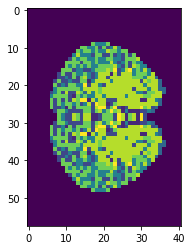

In [14]:
#Visualizing one slice
vol = labels_rc.reshape(67,58,41)
s = vol[20,:,:]
plt.imshow(s)